In [ ]:
import torch
from torch.autograd import Variable
from utee import selector
model_raw, ds_fetcher, is_imagenet = selector.select('resnet50')
ds_val = ds_fetcher(batch_size=10, train=False, val=True)
for idx, (data, target) in enumerate(ds_val):
    data =  Variable(torch.FloatTensor(data)).cuda()
    output = model_raw(data)

In [ ]:
import os
import sys
os.chdir("/data/adv_geom/drg/")
from models.classifier import Classifier

In [ ]:
! ls ../

In [ ]:
from training.train_classifier import TrainClassifier

In [ ]:
%tb
args = {
    "train_images_file": "/data/adv_geom/datasets/emnist/train_images.h5",
    "train_codes_file": "/data/adv_geom/datasets/emnist/train_labels.h5",
    "test_images_file": "/data/adv_geom/datasets/emnist/test_images.h5",
    "test_codes_file": "/data/adv_geom/datasets/emnist/test_labels.h5",
    "state_file": "/data/adv_geom/dumps/emnist/classifier.pth.tar",
    "label_index": 0,
    "lr_decay": 0.95,
    "weight_decay": 0.0001,
    "training_samples": 160000,
    "validation_samples": 40000,
    "random_samples": True,
    "network_architecture": "mlp",
    "gpu_id": 1
}

sys.argv = ["-" + i + "=" + str(args[i]) if type(args[i]) != type(True) else "-" + i for i in args]


program = TrainClassifier(args=sys.argv)



In [ ]:
program.load_data()

In [ ]:
program.load_model_and_scheduler()

In [ ]:
test_image = program.test_images[0:8]
test_codes = program.test_codes[0:8]

In [ ]:
import torch

with torch.no_grad():
    program.model.cuda()
    program.model.eval()
    test_image = torch.Tensor(test_image).cuda()
    logits = program.model(test_image)
    

In [ ]:
torch.max(logits, axis=1)[1]

In [ ]:
test_codes

In [ ]:
clf_report = program.test()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow("test.png")

In [ ]:
program.model

In [ ]:
print(clf_report)

In [ ]:
import numpy as np

In [ ]:
leftover_basis = np.eye(5)

In [ ]:
span = leftover_basis.copy()[2:]

In [ ]:
normals = np.zeros((10, 5)) + 2 * leftover_basis[0] + 3 * leftover_basis[1]

In [ ]:
normals + np.random.normal(size=(10, 5)) * np.sum(span, axis=0)

In [ ]:
a = np.arange(10).reshape(-1, 1)
b = np.ones(10)

In [ ]:
a, b

In [ ]:
import os, glob




dump_dir = "/azuredrive/dumps/expC_dist_learner_for_adv_ex/k2n2/actual_dist_learner_w_masked_mse/test_MTMLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=2;k=2;actual_distance}/14062021-090200/models"
os.chdir(dump_dir)
x = None
for root, dirs, files in os.walk(dump_dir):
    if "models" in root and len(files) > 1:
        x = files
        print(root)
        best_model_fn = sorted(x, key=lambda x: int(x.split("_")[-1].split(".")[0]))[-1]
        
        if len(x) > 1:
            for j in x:
                if j != best_model_fn:
                    os.remove(os.path.join(root, j))
            print(root)
            
        
#         for file in files:
#             if file.endswith(".pth"):
#                  print(os.path.join(root, file))


In [ ]:
! ls "/azuredrive/dumps/expC_dist_learner_for_adv_ex/k2n2/actual_dist_learner_w_masked_mse/test_MTMLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=2;k=2;actual_distance}/14062021-090200/models"







In [ ]:
phases = ["train", "val", "test"]
# data_fns = [TRAIN_FN, VAL_FN, TEST_FN]

splits = {i[0]: {"fn": i[1], "name": i[0]} for i in zip(phases, phases)}


In [ ]:
splits

In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np

X, _ = make_swiss_roll(1000)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=20, edgecolor='k')



In [ ]:
from sklearn.utils import check_random_state
def make_swiss_roll2(n_samples=100, *, noise=0.0, random_state=None):
    """Generate a swiss roll dataset.
    Read more in the :ref:`User Guide <sample_generators>`.
    Parameters
    ----------
    n_samples : int, default=100
        The number of sample points on the S curve.
    noise : float, default=0.0
        The standard deviation of the gaussian noise.
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    X : ndarray of shape (n_samples, 3)
        The points.
    t : ndarray of shape (n_samples,)
        The univariate position of the sample according to the main dimension
        of the points in the manifold.
    Notes
    -----
    The algorithm is from Marsland [1].
    References
    ----------
    .. [1] S. Marsland, "Machine Learning: An Algorithmic Perspective",
           Chapter 10, 2009.
           http://seat.massey.ac.nz/personal/s.r.marsland/Code/10/lle.py
    """
#     generator = check_random_state(random_state)
    t = 1 + 2 * np.random.uniform(0, 10, size=(1, n_samples))

    omega = 10
#     t = 1.5 * np.pi * (1 + 2 * generator.rand(1, n_samples))
    x = (t - 5) * np.cos(t / omega)
    y = 21 * np.random.uniform(size=(1, n_samples))

    z = (t - 5) * np.sin(t / omega)

    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)

    return X, t


def make_swiss_roll_std(n_samples=100, *, noise=0.0, random_state=None):
    """Generate a swiss roll dataset.
    Read more in the :ref:`User Guide <sample_generators>`.
    Parameters
    ----------
    n_samples : int, default=100
        The number of sample points on the S curve.
    noise : float, default=0.0
        The standard deviation of the gaussian noise.
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    X : ndarray of shape (n_samples, 3)
        The points.
    t : ndarray of shape (n_samples,)
        The univariate position of the sample according to the main dimension
        of the points in the manifold.
    Notes
    -----
    The algorithm is from Marsland [1].
    References
    ----------
    .. [1] S. Marsland, "Machine Learning: An Algorithmic Perspective",
           Chapter 10, 2009.
           http://seat.massey.ac.nz/personal/s.r.marsland/Code/10/lle.py
    """
    generator = check_random_state(random_state)
    
    omega = 10
    
    t = 1.5 * np.pi * (1 + 2 * generator.rand(1, n_samples))
#     t = 1 + 2 * np.random.uniform(0, 10, size=(1, n_samples))

    x = t * np.cos(t)
    y = 21 * np.random.uniform(size=(1, n_samples))
    z = t * np.sin(t)

    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)

    return X, t





In [ ]:
X2, t2 = make_swiss_roll_std(100000)
X, t = make_swiss_roll_std(100000)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(0, 90)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='red', s=.001)

ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], edgecolor='k', s=.001)




In [ ]:
t.max()

In [ ]:
X2_sample = X2[0]
t2_sample = t2[0]
# X2_sample = np.array([t2_sample*np.cos(t2_sample), t2_sample*np.sin(t2_sample), -41])
normals_at_X2 = np.zeros_like(X2)
normals_at_X2[:, 0] = np.sin(t2) + t2 * np.cos(t2)
normals_at_X2[:, 2] = -1*np.cos(t2) + t2 * np.sin(t2)
normals_at_X2 = (1.5 / np.linalg.norm(normals_at_X2, ord=2, axis=1)).reshape(-1, 1) * normals_at_X2

off_mfld_pts_at_X2 = X2 + normals_at_X2

# normal_at_X2 = np.array([np.sin(t2_sample) + t2_sample * np.cos(t2_sample), 0, -1*np.cos(t2_sample) + t2_sample * np.sin(t2_sample)])
# normal_at_X2 = (2 / np.linalg.norm(normal_at_X2, ord=2)) * normal_at_X2


plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 2], s=.01, label="X1")
plt.scatter(X2[:, 0], X2[:, 2], s=.01, label="X2")

plt.scatter(off_mfld_pts_at_X2[:, 0], off_mfld_pts_at_X2[:, 2], s=.01, label="off mfld from X2")
plt.legend(markerscale=100)

# plt.scatter(X)
# plt.arrow(X2_sample[0], X2_sample[2], normal_at_X2[0], normal_at_X2[2], head_width=0.5)
random_idx = np.random.choice(np.arange(X2.shape[0]), 10)
for j in range(random_idx.shape[0]):
    i = random_idx[j]
    X2_sample = X2[i]
    normal_at_X2 = normals_at_X2[i]
    
    plt.arrow(X2_sample[0], X2_sample[2], normal_at_X2[0], normal_at_X2[2], head_width=0.2, width=0.001)
plt.show()

In [ ]:
plt.hist(t)

In [ ]:
def identity(x):
    return x

def make_my_swiss_roll(t_min=1.5, t_max=None, num_turns=4, omega=np.pi, num_samples=100000, noise=0, g=identity, correct=True):
    """Generate a swiss roll dataset."""

    if t_max is not None and omega is not None and num_turns is not None:
        assert num_turns == ((t_max - t_min) * omega) / (2 * np.pi), "`num_turns`, `t_max`, and `omega` are incompatible!"
        
    elif t_max is None:
        t_max = t_min + ((2 * np.pi / omega) * num_turns)
        
    elif omega is None:
        omega = (num_turns * 2 * np.pi) / (t_max - t_min)
        
    elif num_turns is None:
        num_turns = ((t_max - t_min) * omega) / (2 * np.pi)
    
    if num_turns < 1:
        print("[warning]: num_turns < 1, might not lead to meaningful dataset")
        if correct:
            scale = omega / np.pi
            t_min = t_min / scale
            t_max = t_max / scale
    
    print("t_min:", t_min, "t_max:", t_max, "omega:", omega, "num_turns:", num_turns, "gap:", 2*np.pi/omega)
    
    t = t_min + (np.random.rand(1, num_samples) * (t_max - t_min))
    
    x = g(t) * np.cos(omega * t)
    y = g(t) * np.sin(omega * t)
    z = 21 * np.random.uniform(size=(1, num_samples))
    
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, num_samples)
    X = X.T
    
    t = np.squeeze(t)
    
    return X, t

In [ ]:
def contract(x, k=np.pi):
    return x - k

from functools import partial

scale = .010
omega = np.pi * scale
t_min = 1.5 
t_max = 4.5 
# t_max = None
contract_partial = partial(contract, k=np.pi/omega)

X1, t1 = make_my_swiss_roll(t_min=t_min, t_max=t_max, num_turns=None, omega=omega)
X2, t2 = make_my_swiss_roll(t_min=t_min, t_max=t_max, num_turns=None, g=contract_partial, omega=omega)

plt.figure(figsize=(6,6))
plt.scatter(X1[:, 0], X1[:, 1], s=0.01, label="M1")
plt.scatter(X2[:, 0], X2[:, 1], s=0.01, label="M2")
plt.legend(markerscale=100)

In [ ]:
X1

In [ ]:
import os
os.chdir("/data/adv_geom/src/expB/")
from myNNs import *
import torch

In [ ]:
inp = torch.randn((512, 2))
model = MTMLPwithNormalisation(input_size=2, output_size=1)

In [ ]:
model

In [ ]:
model2 = MLPwithNormalisation(input_size=2, output_size=2)
model2(inp).shape

In [ ]:
import os
os.chdir("../src/datagen/synthetic/single/")



In [ ]:
np.argmin(t)

In [ ]:
%run -i sphere.py



In [ ]:
! cat ./test/specs.json

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(test.genattrs.points_n[:, 0], test.genattrs.points_n[:, 1], s=0.01)



In [ ]:
import matplotlib.pyplot as plt
plt.scatter(b.genattrs.points_n[:, 0], b.genattrs.points_n[:, 1], s=0.01)



In [ ]:
from collections.abc import Iterable
for i in vars(test._genattrs):
    if isinstance(vars(test._genattrs)[i], Iterable):
        print(i, type(vars(test._genattrs)[i]), (vars(test._genattrs)[i] == vars(b._genattrs)[i]).all())
    else:
        print(i, type(vars(test._genattrs)[i]), (vars(test._genattrs)[i] == vars(b._genattrs)[i]))
        
from collections.abc import Iterable
for i in vars(test._specattrs):
    if isinstance(vars(test._specattrs)[i], Iterable):
        print(i, type(vars(test._specattrs)[i]), (vars(test._specattrs)[i] == vars(b._specattrs)[i]).all())
    else:
        print(i, type(vars(test._specattrs)[i]), (vars(test._specattrs)[i] == vars(b._specattrs)[i]))


In [ ]:
"fix_center" in list(vars(test._genattrs).keys())

In [ ]:
cat test/specs.json

In [ ]:
vars(b.specattrs)

In [ ]:
import os
os.chdir("../src/")

In [ ]:
%run -i datagen_tester.py



In [ ]:
plt.scatter(test.normed_all_points[:, 0], test.normed_all_points[:, 1], s=0.01)

In [ ]:
np.inf == np.inf

In [ ]:
tmp = eval(inspect.getsourcelines(identity)[0][0].strip().split("=")[1].strip())

In [ ]:
identity == tmp

In [ ]:
cat ./test/specs.json

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib
from mpl_toolkits import mplot3d as p3
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [ ]:
x_cn = np.random.normal(size=3)
v_1 = np.random.normal(size=3)
v_1 = v_1 / np.linalg.norm(v_1 - x_cn, ord=2)
v_2 = np.random.normal(size=3)
v_2 = v_2 / np.linalg.norm(v_2 - x_cn, ord=2)

b_1 = v_1 - x_cn
b_2 = v_2 - x_cn
b_2 = b_2 - np.dot(b_1, b_2) * b_1

coefficients = np.random.uniform(size=(100000, 2))
span = coefficients[:, 0].reshape(-1, 1) * b_1 + coefficients[:, 1].reshape(-1, 1) * b_2
span = span + x_cn

# fig = plt.figure()
# ax = p3.Axes3D(fig)
# # ax.view_init(0, 90)
# ax.scatter(span[:, 0], span[:, 1], span[:, 2], edgecolor='red', s=.01)
# ax.scatter(x_cn[0], x_cn[1], x_cn[2], edgecolors="k", s=10)
# ax.scatter(v_1[0], v_1[1], v_1[2], edgecolors="k", s=10)
# ax.scatter(v_2[0], v_2[1], v_2[2], edgecolors="k", s=10)


df = pd.DataFrame({"x": span[:, 0], "y": span[:, 1], "z": span[:, 2]})
fig = px.scatter_3d(df, x='x', y='y', z='z', opacity=0.2)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=1))
fig.show()

In [ ]:
np.dot(b_1, b_2)

In [ ]:
func = 'lambda x: x + 2'
a = eval(func)
b = lambda x: a(x) - 2
a(2), b(3)

In [ ]:
import os
os.chdir("../src/")
%run datagen_tester.py

In [ ]:
plt.scatter(train_set.normed_all_points[:, 0], train_set.normed_all_points[:, 1], s=0.01)

In [ ]:
from sklearn.metrics import classification_report

a = np.ones(5)
b = np.ones(5)

classification_report(a, b, output_dict=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(6, 6))
img=mpimg.imread('/azuredrive/dumps/expC_dist_learner_for_adv_ex/rdm_swrolls/rdm_swiss_rolls_k2n3/1/plots/fig-1.png')
imgplot = plt.imshow(img)

In [ ]:
import os
os.chdir("../src/")

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
from datagen.synthetic.multiple.intertwinedswissrolls import IntertwinedSwissRolls
import matplotlib.pyplot as plt

train_set, val_set, test_set = IntertwinedSwissRolls.make_train_val_test_splits()

In [ ]:
train_set.normed_all_points

In [ ]:
plt.scatter(val_set.normed_all_points[:, 0], val_set.normed_all_points[:, 1], s=0.01)

In [ ]:

df = pd.DataFrame({"x": val_set.normed_all_points[:, 0],\
     "y": val_set.normed_all_points[:, 1],\
     "z": val_set.normed_all_points[:, 2]})
fig = px.scatter_3d(df, opacity=0.3, x="x", y="y", z="z")
fig.update_traces(marker=dict(size=2))

In [ ]:
import re
import numpy as np
import torch

k_dim_samples = np.zeros((val_set.N, 2))
start = 0
for attr in vars(val_set):
    if len(re.findall(r'S[0-9]+', attr)) > 0:
        N_attr = getattr(val_set, attr).genattrs.N
        k_dim_samples[start:start + N_attr//2] = getattr(val_set, attr).genattrs.points_k
        k_dim_samples[start + N_attr//2:start + N_attr] = getattr(val_set, attr).genattrs.pre_images_k
        start += N_attr
k_dim_samples = val_set.all_points_k
low = (1 - np.sign(np.min(k_dim_samples)) * 0.1) * np.min(k_dim_samples) 
high = (1 + np.sign(np.max(k_dim_samples)) * 0.1) * np.max(k_dim_samples)

In [ ]:
gen_2d_grid = np.random.uniform(low, high, size=(100000, 2))

plt.scatter(gen_2d_grid[:, 0], gen_2d_grid[:, 1])
plt.scatter(k_dim_samples[:, 0], k_dim_samples[:, 1])

In [ ]:
gen_nd_grid = np.zeros((100000, 3))

gen_nd_grid[:, :2] = gen_2d_grid
gen_nd_grid += val_set.translation
gen_nd_grid = np.dot(val_set.rotation, gen_nd_grid.T).T
gen_nd_grid = gen_nd_grid / val_set.norm_factor
gen_nd_grid = torch.from_numpy(gen_nd_grid).float()
gen_nd_grid = gen_nd_grid - val_set.anchor + val_set.fix_center


In [ ]:
df2 = pd.DataFrame({
    "x": gen_nd_grid[:, 0],
    "y": gen_nd_grid[:, 1],
    "z": gen_nd_grid[:, 2]
})

df = df.append(df2, ignore_index=True)

fig = px.scatter_3d(df, opacity=0.3, x="x", y="y", z="z")
fig.update_traces(marker=dict(size=2, color=["red"]*val_set.normed_all_points.shape[0] + ["yellow"]*gen_nd_grid.shape[0]))

In [1]:
import os
os.chdir("/data/adv_geom/src")


In [3]:
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres

In [3]:
train_set, val_set, test_set = ConcentricSpheres.make_train_val_test_splits()



[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S1
[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S2
[ConcentricSpheres]: Overall noramalization done
[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S1
[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S2
[Concen

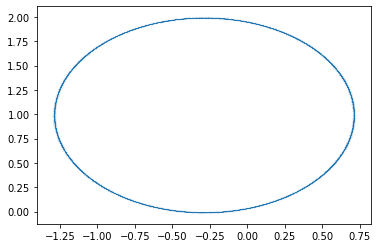

In [42]:
import matplotlib.pyplot as plt

# plt.scatter(train_set.normed_all_points[:, 0].numpy(), train_set.normed_all_points[:, 1].numpy(), s=0.01, c=train_set.class_labels.numpy())
# plt.scatter(train_set.[:, 0].numpy(), train_set.all_points[:, 1].numpy(), s=0.01)

plt.scatter(train_set.S1.genattrs.points_n_tr_[:, 0], train_set.S1.genattrs.points_n_tr_[:, 1], s=0.0001)
# plt.scatter(train_set.S2.genattrs.normed_points_n[:, 0].numpy(), train_set.S2.genattrs.normed_points_n[:, 1].numpy(), s=0.01)

In [40]:
train_set.S1.genattrs.points_n_tr_.shape

(100000, 500)

In [ ]:
(train_set.all_points // train_set.norm_factor) - train_set.anchor + train_set.fix_center

In [ ]:
train_set.S1.specattrs.r, train_set.S2.specattrs.r, train_set.r, train_set.g

In [ ]:
train_set._anchor, train_set.fix_center

In [ ]:
train_set.S1.specattrs.normed_x_cn

In [12]:
train_set.S1.genattrs.max_norm

0.25

In [13]:
train_set.S1.genattrs.D

0.2

In [38]:
train_set, val_set, test_set = ConcentricSpheres.load_splits("/azuredrive/deepimage/data1/t-achetan/adv_geom_dumps/dumps/expD_distlearner_against_adv_eg/rdm_concspheres/rdm_concspheres_k2n500/data")




In [34]:
train_set.normed_all_actual_distances


tensor([[ 2.2204e-16,         inf],
        [-1.1102e-16,         inf],
        [ 0.0000e+00,         inf],
        ...,
        [        inf, -2.2204e-16],
        [        inf,  0.0000e+00],
        [        inf,  0.0000e+00]])